# import all packages

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# read data
data = pd.read_csv('train.csv', sep=',')
display(data.shape)
display(data.head())
display(data.info())
display(data.describe())
display(data.nunique())

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# How many is there missing values?

In [35]:
data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
#data.drop(['Cabin'], axis=1,inplace=True)
data.fillna(0,inplace=True)
data.isnull().sum(axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Dealing with the strings

In [37]:
strings_cols = data.select_dtypes(['object']).columns
data[strings_cols]=data[strings_cols].astype('category').apply(lambda x:x.cat.codes)

# Dealing with the separate data into train, validation,test.

In [38]:
Ydata = data.iloc[:,1]
Xdata = data.iloc[:,2:]

rd_seed = 1234

from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest = train_test_split(Xdata,Ydata,test_size=0.25, random_state=rd_seed)

Xtrain,Xval,Ytrain,Yval = train_test_split(Xtrain,Ytrain,test_size=0.25, random_state=rd_seed)

display(Xtrain.shape)
display(Ytrain.shape)
display(Xval.shape)
display(Yval.shape)
display(Xtest.shape)
display(Ytest.shape)


(501, 10)

(501,)

(167, 10)

(167,)

(223, 10)

(223,)

# Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Tree Tunning

In [40]:
from sklearn.model_selection import ParameterGrid
import sklearn.metrics as metrics
param_grid = {
    'max_depth': range(1,150),
    'criterion': ['entropy', 'gini'],
    'splitter': ['best', 'random']

}

param_comb = ParameterGrid(param_grid)

val_acc = []
train_acc = []
for params in param_comb:
    dt = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion']
    ,splitter=params['splitter'])
    dt.fit(Xtrain, Ytrain)
    train_acc.append(metrics.accuracy_score(Ytrain, dt.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(Yval, dt.predict(Xval)))

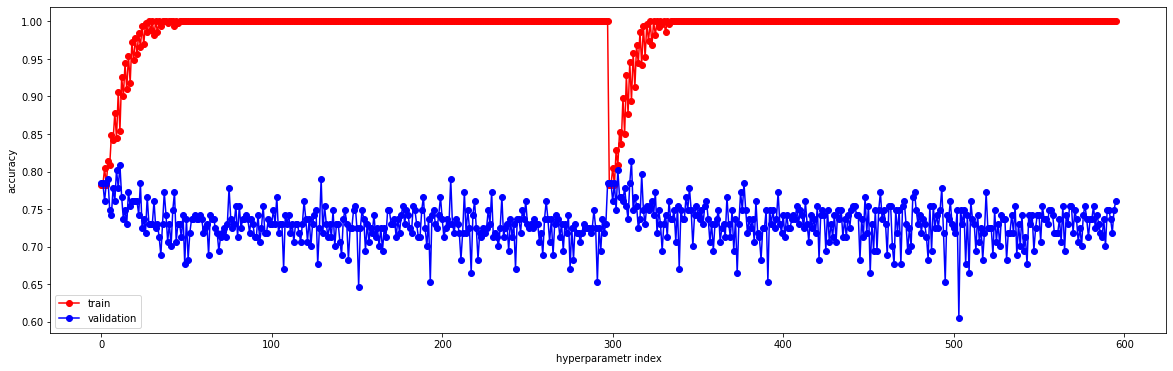

In [41]:
plt.figure(figsize=(20,6))
plt.plot(train_acc,'or-')
plt.plot(val_acc,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [42]:
best_params = param_comb[np.argmax(val_acc)]
best_params

{'splitter': 'random', 'max_depth': 7, 'criterion': 'gini'}

In [43]:
dt = DecisionTreeClassifier(**best_params) # TOHOTO ŘÁDKU si všimněte: dvě hvězdišky jsou mocný nástroj
dt.fit(Xtrain, Ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(Ytrain, dt.predict(Xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(Yval, dt.predict(Xval))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(Ytest, dt.predict(Xtest))))

accuracy score (train): 0.908184
accuracy score (validation): 0.778443
accuracy score (test): 0.793722


In [44]:
tdata = pd.read_csv('test.csv', sep=',')
display(tdata.shape)
display(tdata.head())
display(tdata.info())
display(tdata.describe())
display(tdata.nunique())

(418, 11)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

# How many is there missing values?

In [45]:
tdata.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [46]:
#tdata.drop(['Cabin'], axis=1,inplace=True)
tdata.fillna(0,inplace=True)
tdata.isnull().sum(axis=0)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Dealing with the strings

In [47]:
strings_cols = tdata.select_dtypes(['object']).columns
tdata[strings_cols]=data[strings_cols].astype('category').apply(lambda x:x.cat.codes)

In [48]:
kaagle = tdata.iloc[:,1:]

In [49]:
out = pd.DataFrame()
out['PassengerId'] = tdata['PassengerId']
out['Survived'] = dt.predict(kaagle)

In [50]:
out.to_csv('titanic_pred_kaggle.csv', index=False)